In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import proplot

# # Plotting parameters, proplot uisage is optional, but adds nice aesthetics:
# proplot.rc['figure.facecolor'] = 'white'
# proplot.rc.update(
#     linewidth=1, fontsize=9,
#     color='dark blue', suptitlecolor='dark blue',
#     titleloc='upper center', titlecolor='dark blue', titleborder=False,
# )

# mpl.rcParams['font.sans-serif'] = "Arial" # Set the font
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['grid.alpha'] = 0 # Remove the grid
mpl.rcParams['xtick.major.bottom'] = True # Remove minor ticks
mpl.rcParams['ytick.major.left'] = True
mpl.rcParams['xtick.minor.bottom'] = True # Remove minor ticks
mpl.rcParams['ytick.minor.left'] = True
mpl.rcParams['ytick.minor.right'] = False
mpl.rcParams['axes.spines.right'] = False # switch off top and right spines
mpl.rcParams['axes.spines.top'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import glob
%matplotlib inline

### Parse benchmark outputs

In [3]:
benchmark_outputs = glob.glob("./benchmarks*/*gpu*")
len(benchmark_outputs)

15

In [4]:
benchmark_table = []
for output in benchmark_outputs:
    
    fname = output.split('/')[-1]
    test = fname.split('.')[1]
    n_beads = fname.split('.')[2]
    machine = fname.split('.')[3]
    mode_compaction = fname.split('.')[4]
    backend = fname.split('.')[5]
    
    df = pd.read_table(output)
    
    df.loc[:, 'test_name'] = test
    df.loc[:, 'n_beads'] = n_beads
    df.loc[:, 'machine'] = machine
    df.loc[:, 'mode_compaction'] = mode_compaction
    df.loc[:, 'backend'] = backend
    
    benchmark_table.append(df.copy())
    del df

In [5]:
benchmark_table = pd.concat(benchmark_table)

In [6]:
len(benchmark_table)

75

In [7]:
benchmark_table.tail()

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,test_name,n_beads,machine,mode_compaction,backend
0,14.7344,0:00:14,272.11,35106.19,210.93,223.01,0.0,4.23,97.31,15.25,gpu-test,4000,ip-172-31-34-148,constant_box,openmm
1,14.7066,0:00:14,272.52,35106.19,210.43,224.94,0.0,8.62,97.57,15.65,gpu-test,4000,ip-172-31-34-148,constant_box,openmm
2,14.6223,0:00:14,272.02,35106.19,210.63,224.57,0.0,13.07,98.20,16.07,gpu-test,4000,ip-172-31-34-148,constant_box,openmm
3,14.6935,0:00:14,272.52,35106.19,209.84,222.35,0.0,17.42,97.50,16.44,gpu-test,4000,ip-172-31-34-148,constant_box,openmm
4,14.7192,0:00:14,271.85,35106.19,211.11,226.00,0.0,21.82,97.42,16.86,gpu-test,4000,ip-172-31-34-148,constant_box,openmm


In [8]:
benchmark_table.loc[:, 'n_beads'] = benchmark_table.n_beads.astype(int)

In [9]:
np.unique( benchmark_table.machine )

array(['ip-172-31-34-148'], dtype=object)

In [10]:
benchmark_table.loc[:, "GPU type"] = benchmark_table.machine.map({
    'ip-172-31-34-148': 'Tesla V100-SXM2-16GB',
})

In [11]:
machines_order = ['ip-172-31-34-148']

In [12]:
n_beads_order = [1000, 4000, 10000, 40000, 80000, 200000, 240000, 320000, 400000, 640000]

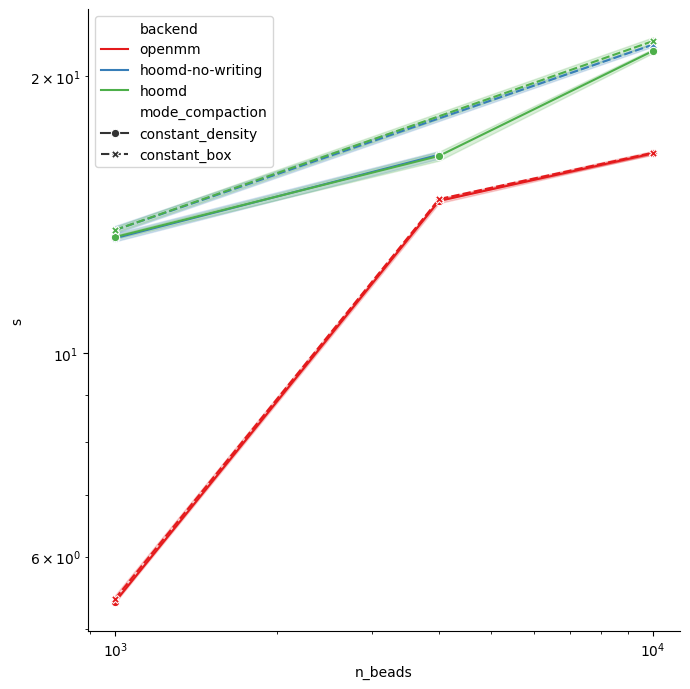

In [13]:
# Total runtime

plt.figure(figsize=[7, 7])
sns.lineplot(
    data=benchmark_table, 
            x='n_beads', y='s',
            hue='backend', 
            style='mode_compaction',
            markers=True, 
            palette='Set1',
            )

plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.show()

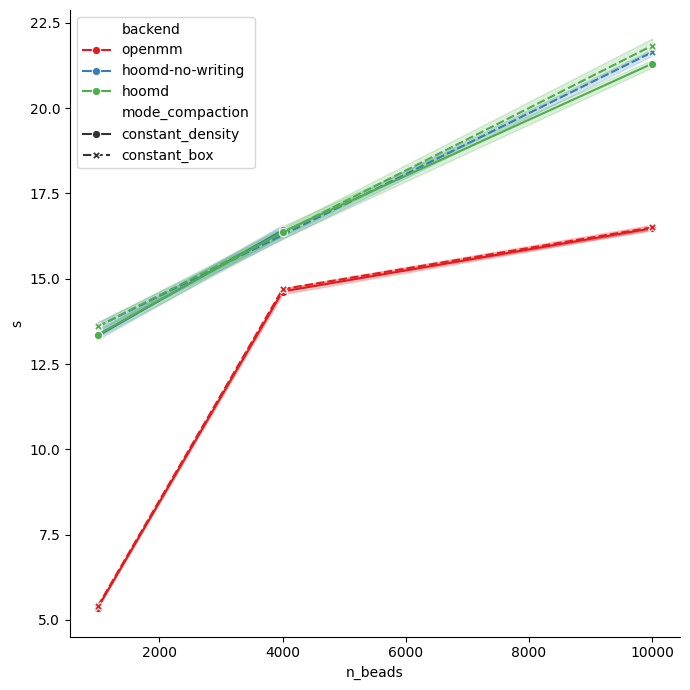

In [14]:
# Total runtime

plt.figure(figsize=[7, 7])
sns.lineplot(
    data=benchmark_table, 
            x='n_beads', y='s', 
            hue='backend', 
            style='mode_compaction',
            markers=True, marker="o",
            palette='Set1',
            )

# plt.yscale('log')
# plt.xscale('log')

plt.tight_layout()
plt.show()